<a href="https://colab.research.google.com/github/123Cub123Cub1234/Statistical-Learning-Work/blob/main/STAT_4360_MINI_PROJECT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import rpy2
import rpy2.robjects as ro

In [ ]:
# data
train = pd.read_csv("1-training_data.csv")
test = pd.read_csv("1-test_data.csv")

# rename columns since we can't have . in the name
train = train.rename(columns = {'x.1' : 'x_1', 'x.2' : 'x_2'})
test = test.rename(columns = {'x.1' : 'x_1', 'x.2' : 'x_2'})

# training data
trainX = train[['x_1', 'x_2']]
trainY = train[['y']]

# test data
testX = test[['x_1', 'x_2']]
testY = test[['y']]

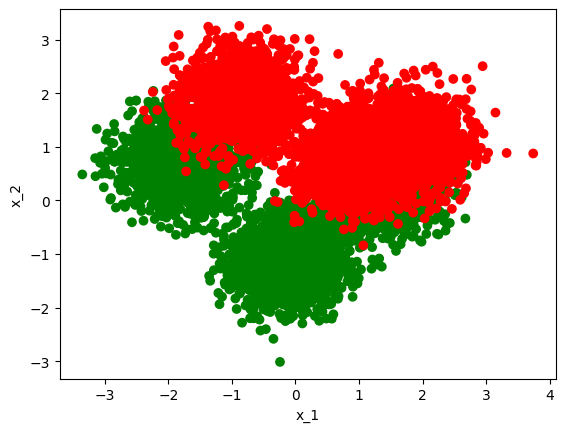

In [ ]:
import matplotlib.pyplot as plt
colors = {'yes': 'green', 'no': 'red'}
plt.scatter(train['x_1'], train['x_2'], c = train['y'].map(colors))
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

In [ ]:
# Part (A)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
ks = np.arange(1,201,5)
nks = ks.shape
err_rate_train = []
err_rate_test = []

for k in ks:
  mod = KNeighborsClassifier(n_neighbors=k)
  mod.fit(trainX, trainY)
  mod_train = mod.predict(trainX)
  mod_test = mod.predict(testX)
  err_rate_train.append(1 - accuracy_score(trainY, mod_train)) # began using the accuracy score method because I was getting errors from the code example
  err_rate_test.append(1 - accuracy_score(testY, mod_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
# Test to see if training error populated
print(err_rate_train)

[0.0, 0.1049, 0.11060000000000003, 0.11550000000000005, 0.11570000000000003, 0.11660000000000004, 0.11519999999999997, 0.11770000000000003, 0.11660000000000004, 0.11780000000000002, 0.11599999999999999, 0.11709999999999998, 0.11680000000000001, 0.11680000000000001, 0.11719999999999997, 0.11770000000000003, 0.11699999999999999, 0.11780000000000002, 0.11770000000000003, 0.1179, 0.118, 0.119, 0.11880000000000002, 0.11829999999999996, 0.11860000000000004, 0.11860000000000004, 0.11850000000000005, 0.11939999999999995, 0.11919999999999997, 0.11909999999999998, 0.11819999999999997, 0.11860000000000004, 0.11860000000000004, 0.11829999999999996, 0.11850000000000005, 0.11870000000000003, 0.11829999999999996, 0.11839999999999995, 0.11809999999999998, 0.11860000000000004]


In [ ]:
# Test to see if test error populated
print(err_rate_test)

[0.17049999999999998, 0.131, 0.134, 0.123, 0.12250000000000005, 0.12050000000000005, 0.12250000000000005, 0.12250000000000005, 0.12150000000000005, 0.126, 0.125, 0.124, 0.122, 0.12, 0.12050000000000005, 0.11950000000000005, 0.11950000000000005, 0.11599999999999999, 0.11699999999999999, 0.119, 0.11699999999999999, 0.11699999999999999, 0.11850000000000005, 0.11499999999999999, 0.11699999999999999, 0.119, 0.11650000000000005, 0.118, 0.118, 0.11699999999999999, 0.11699999999999999, 0.11750000000000005, 0.11850000000000005, 0.119, 0.11950000000000005, 0.118, 0.118, 0.118, 0.118, 0.119]


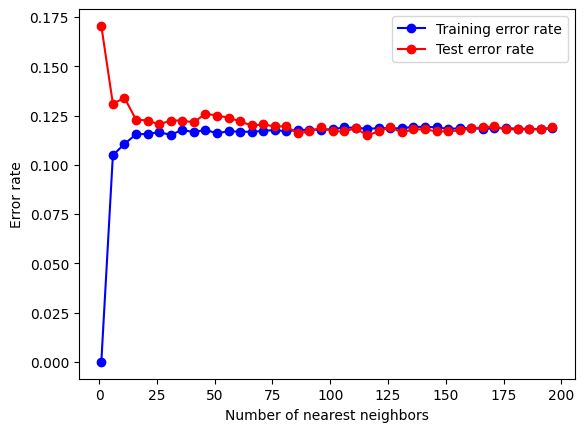

In [ ]:
# Part (B)

plt.plot(ks, err_rate_train, "bo-", label = "Training error rate")
plt.plot(ks, err_rate_test, "ro-", label = "Test error rate" )
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Error rate')
plt.legend(loc="best")
plt.show()

116 0.11829999999999996 0.11499999999999999


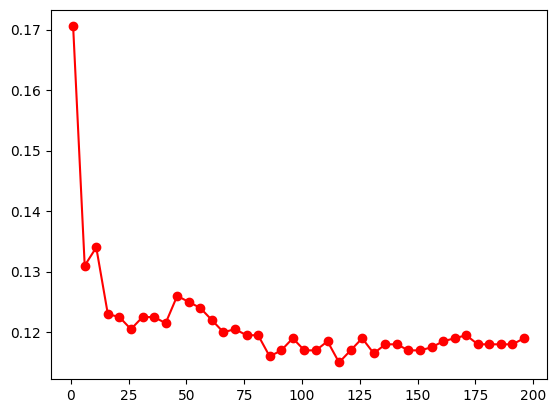

In [ ]:
# Part (C)

plt.plot(ks, err_rate_test, "ro-", label = "Test error rate" )
min_error_index = min(err_rate_test)
# Test - print(min_error_index)
optimal_k = ks[err_rate_test.index(min(err_rate_test))]
# Test - print(optimal_k)
optimal_k_train_error = err_rate_train[np.argmin(err_rate_test)]
optimal_k_test_error = err_rate_test[np.argmin(err_rate_test)]
# Test - print(optimal_k_training_error)

print(optimal_k, optimal_k_train_error, optimal_k_test_error)

In [ ]:
# Part (D)

n_grid = 1000
x1_grid = np.linspace(trainX.x_1.min(), trainX.x_1.max(), num = n_grid)
x2_grid = np.linspace(trainX.x_2.min(), trainX.x_2.max(), num = n_grid)
xx, yy = np.meshgrid(x1_grid,x2_grid, indexing = 'ij')
grid = np.hstack((xx.reshape([-1,1]), yy.reshape([-1,1])))
print(grid.shape)

mod = KNeighborsClassifier(n_neighbors=optimal_k)
mod.fit(trainX.to_numpy(), trainY)

prob = mod.predict_proba(grid)[:,1]
probs = prob.reshape([n_grid, n_grid])
print(prob)

(1000000, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[1.         1.         1.         ... 0.00862069 0.00862069 0.00862069]


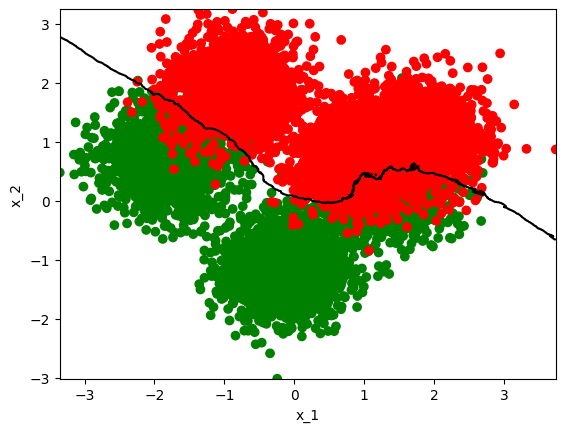

In [ ]:
plt.scatter(train['x_1'], train['x_2'], c=train['y'].map(colors))
plt.contour(xx, yy, probs, [0.5],colors = 'black')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()